### Quantum Fourier Transform (QFT) 

Quantum Fourier Transform (QFT) is a fundamental algorithm in quantum computing. It is the quantum analogue of the classical discrete Fourier transform (DFT) and plays a crucial role in many quantum algorithms, including Shor's algorithm for factoring large numbers and the Quantum Phase Estimation algorithm.

Below is an example of implementing the Quantum Fourier Transform using Qiskit

In this example, we perform the following steps:

✅ QFT and Inverse QFT Functions: We define functions to apply the QFT and its inverse on a set of qubits.

✅ Circuit Initialization: We create a quantum circuit and initialize the qubits to a superposition state using Hadamard gates.

✅ QFT Application: We apply the QFT to the qubits.

✅ Circuit Visualization: We visualize the circuit after the QFT is applied.

✅ Inverse QFT Application: We apply the inverse QFT to the qubits to verify correctness.

✅ Measurement: We measure the qubits to get the final state.

✅ Transpilation and Visualization: We transpile the circuit for the simulator and visualize the transpiled circuit.

✅ Simulation and Results: We simulate the transpiled circuit using the AerSimulator, compile the circuit, and plot the measurement results.

Quantum Fourier Transform is a cornerstone of many quantum algorithms, enabling operations that are exponentially faster than their classical counterparts. By understanding and implementing QFT, we can explore the powerful capabilities of quantum computing.


In [39]:
# Import necessary libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [40]:
# Function to apply QFT
def apply_qft(circuit, n):
    """Apply QFT on the first n qubits in the circuit"""
    for j in range(n):
        for k in range(j):
            circuit.cp(np.pi/2**(j-k), k, j)
        circuit.h(j)

In [41]:
# Function to apply inverse QFT
def apply_inverse_qft(circuit, n):
    """Apply inverse QFT on the first n qubits in the circuit"""
    for j in range(n//2):
        circuit.swap(j, n-1-j)
    for j in reversed(range(n)):
        circuit.h(j)
        for k in reversed(range(j)):
            circuit.cp(-np.pi/2**(j-k), k, j)

In [42]:
# Create a quantum circuit
num_qubits = 3
qc = QuantumCircuit(num_qubits)

In [43]:
# Apply Hadamard gates to nitialize the qubits to a superposition state
qc.h(range(num_qubits))

In [44]:
# Apply QFT
apply_qft(qc, num_qubits)

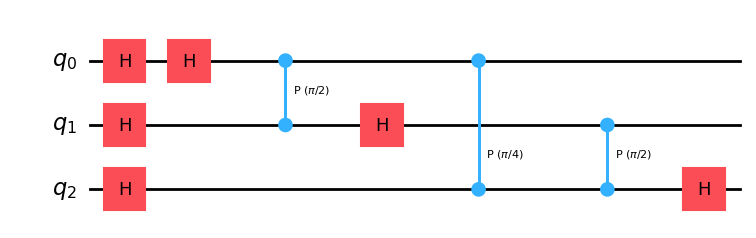

In [45]:
# Draw the circuit after QFT
qc.draw('mpl')
plt.show()

In [46]:
# Apply inverse QFT to verify correctness
apply_inverse_qft(qc, num_qubits)

In [47]:
# Measure the qubits
qc.measure_all()

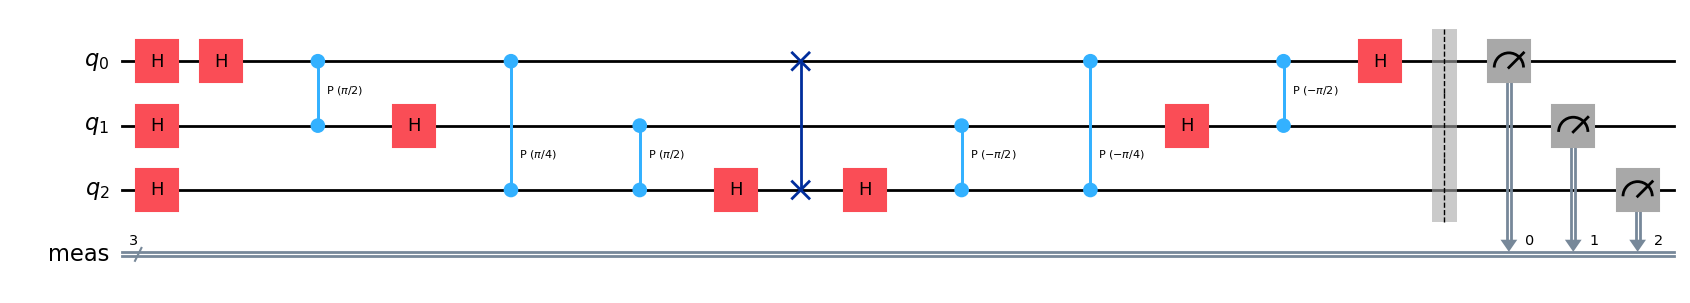

In [48]:
# Draw the final circuit
qc.draw('mpl')
plt.show()

In [49]:
# Initialize the simulator
simulator = AerSimulator()

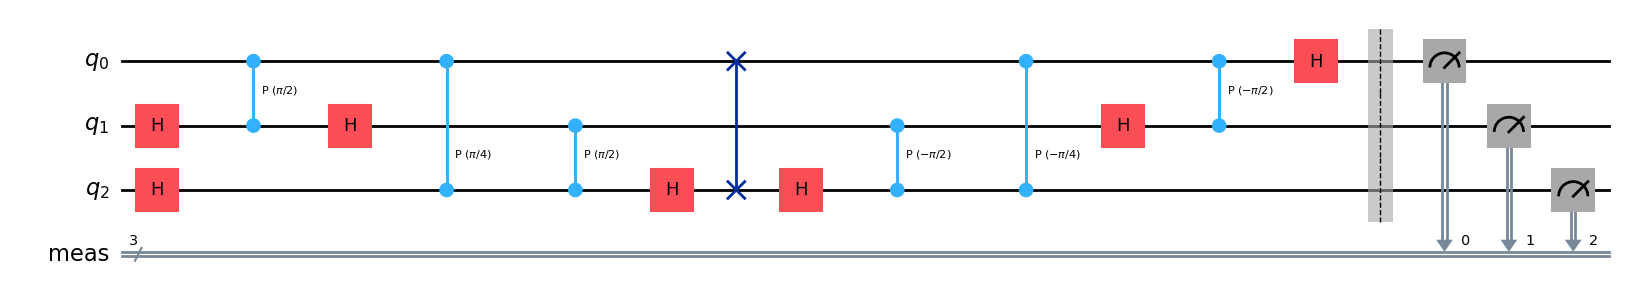

In [50]:
# Transpile and execute the circuit on the simulator
compiled_circuit = transpile(qc, simulator)
# Draw the transpiled circuit
compiled_circuit.draw('mpl')
plt.show()

result = simulator.run(compiled_circuit).result()

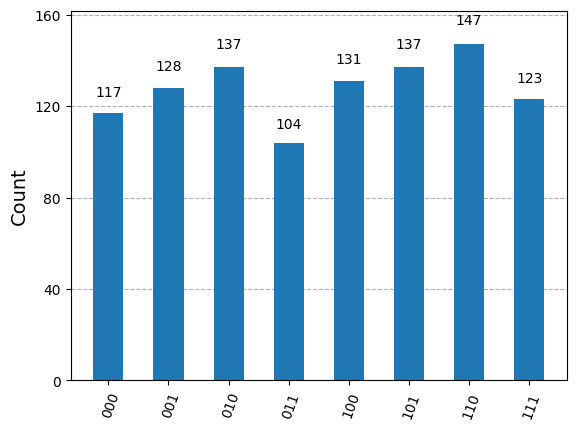

In [51]:
 
# Get and plot the results
counts = result.get_counts(qc)
plot_histogram(counts)
plt.show()
